In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pickle as pkl
import torch.autograd as autograd
import torch.nn as nn
import os
import gensim
import nltk
import random
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import enchant
import matplotlib.pyplot as plt
from nltk import WordNetLemmatizer, word_tokenize, bigrams, ngrams, RegexpTokenizer
lemmatize = WordNetLemmatizer()
%matplotlib inline

We want to load in a document of the followingn form.  Each element of the list may be a full-length text.

In [2]:
# Example:

documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]

In [3]:
def clean_string(text):
    tokens = word_tokenize(text)
    clean_tokens = [lemmatize.lemmatize(token.lower().strip()) for token in tokens]
    return ' '.join(clean_tokens)



def clean_corpus(documents):
    return [clean_string(doc) for doc in documents]  

In [4]:
with open("text_files/brothers_karamazov.txt", "r") as myfile:
    bk_data=myfile.readlines()
    
# Here, string is just one long clean text string.    

string =' '.join(clean_corpus(bk_data))

Now let's load in some data and create a bot!  First we need to define an encoder.  We must make sure that the decoder knows all the words we use in the training data, or else somehow deal with the unknown words.  At the moment, I'm just going to get around this by building the encoder on the data used later for training.  This is not the optimal solution and I plan to return to this issue later.  Let's make our first bot with the Brothers Karamazov. 

# craycray
### Number one Dostoevsky fan.

In [26]:
google_vec_file = '~/Downloads/GoogleNews-vectors-negative300.bin'
encoder = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)
w2v_bk=gensim.models.Word2Vec([string.split()], size=300, window=5, min_count=1, workers=4,sg=1)

Now we instantiate a bot.

In [27]:
craycray=CRAYBOT(sent_length=10,n_samples=10000,hidden_size=300,n_layers=3,max_iter=100,encoder=w2v_bk)

Let's feed the bot some training data.

In [28]:
craycray.fit(string)

In [297]:
craycray.predict(['You are'],7)

/Users/williamcottrell72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:145: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


'You are good turned i , prominently i and'

Note that CRAYBOT stores the cross-entropy loss so we can make a plot in the end.

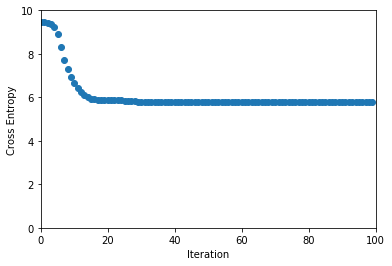

In [38]:
plt.scatter(range(100),craycray.losses)
plt.xlabel('Iteration')
plt.ylabel('Cross Entropy')
plt.xlim(0,100)
plt.ylim(0,10)
plt.show()

## Let's try some crazy data!

# Conspiro_Bot:  
### Likes to talk about the illuminati!

In [51]:
with open('text_files/Bloodlines_of_the_illuminati__1995.txt','r') as f:
    illuminati=f.readlines()

In [75]:
# Just a long cleaned string....

string_ill =' '.join(clean_corpus(illuminati))

In [199]:
w2v_ill=gensim.models.Word2Vec([string_ill.split()], size=100, window=5, min_count=1, workers=4,sg=1)
conspiro_bot=CRAYBOT(sent_length=10,n_samples=1000,hidden_size=100,n_layers=4,max_iter=60,encoder=w2v_ill)

In [200]:
conspiro_bot.fit(string_ill)

In [204]:
conspiro_bot.predict(['he is'],5)

/Users/williamcottrell72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:145: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


'he is difficulty them to jeebies situated'

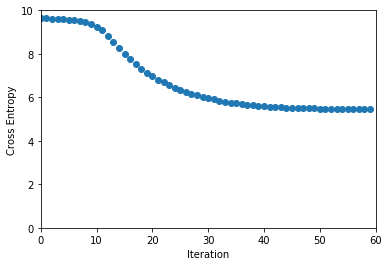

In [181]:
plt.scatter(range(60),conspiro_bot.losses)
plt.xlabel('Iteration')
plt.ylabel('Cross Entropy')
plt.xlim(0,60)
plt.ylim(0,10)
plt.show()

# Botbot
### His only teachers are netizens

In [92]:
with open('text_files/messed_np_vecs.pkl','rb') as f:
    messed_np_vecs=pkl.load(f)
    
with open('text_files/km.pkl','rb') as f:
    km=pkl.load(f)
    
with open('text_files/messed','rb') as f:
    messed=pkl.load(f)

In [98]:
#km.predict(messed_np_vecs)

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [99]:
long_messages=[x for x in messed['messages'] if len(' '.join(x))>50]
long_string=' '.join(clean_corpus(long_messages))

In [123]:
w2v_bot=gensim.models.Word2Vec([long_string.split()], size=100, window=5, min_count=1, workers=4,sg=1)
bot_bot=CRAYBOT(sent_length=10,n_samples=1000,hidden_size=100,n_layers=4,max_iter=60,encoder=w2v_bot)

In [121]:
bot_bot.fit(long_string)

In [134]:
bot_bot.predict(['More'],10)

/Users/williamcottrell72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:145: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


"More 13-åring prône rund fausse tectonics tarde interrupt l'humain //www.gofundme.com/liver-transplant-for-zahid wähler"

# Wonder_bot
### Big fan of Lewis Carroll

In [299]:
with open('text_files/carroll-alice.txt','r') as f:
    aiw=f.readlines()
    
string_aiw=' '.join(clean_corpus(aiw))

In [331]:
w2v_aiw=gensim.models.Word2Vec([string_aiw.split()], size=100, window=5, min_count=1, workers=4,sg=1)
wonder_bot=CRAYBOT(temperature = 1,sent_length=3,n_samples=10000,hidden_size=200,n_layers=4,max_iter=100,encoder=w2v_aiw)

In [332]:
wonder_bot.fit(string_aiw)

In [341]:
wonder_bot.predict(['He said that'],10)

/Users/williamcottrell72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:146: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


"He said that looking to and take ill ' way he know ,"

In [338]:
len(wonder_bot.losses)

100

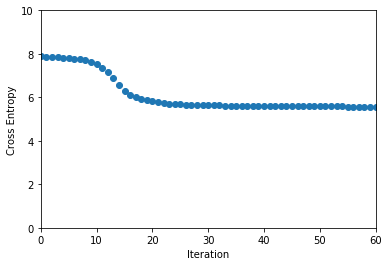

In [340]:
plt.scatter(range(wonder_bot.max_iter),wonder_bot.losses)
plt.xlabel('Iteration')
plt.ylabel('Cross Entropy')
plt.xlim(0,60)
plt.ylim(0,10)
plt.show()

# Craybot Clustering

Now let's see how well KMeans does at separating out the text from different bots.  First, let's generate a bunch of labeled data.  (bot_bot since there are too many non-English phrases.)

In [188]:
full_string = string+ ' '+string_ill+' '+string_aiw
w2v_full=gensim.models.Word2Vec([full_string.split()], size=100, window=5, min_count=1, workers=4,sg=1)

Now let's make a 1000 sentences for each bot.

In [205]:
cray_data=[]
wonder_data=[]
conspiro_data=[]
for _ in range(1000):
    cray_new=craycray.predict(['You are'],10)
    wonder_new=wonder_bot.predict(['You are'],10)
    conspiro_new=conspiro_bot.predict(['You are'],10)
    cray_data.append([cray_new,1])
    wonder_data.append([wonder_new,2])
    conspiro_data.append([conspiro_new,3])


/Users/williamcottrell72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:145: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [242]:
with open('data/markov_data.pkl','rb') as f:
    markov_data=pkl.load(f)

We need a helper function in order to convert each sentence to a single vector.  I'm going to do something very naive and just average the vectors for each word.  The following function will help.

In [208]:
def get_doc_vec(words, model):
    good_words = []
    for word in words:
        # Words not in the original model will fail
        try:
            if model.wv[word] is not None:
                good_words.append(word)
        except:
            continue
    # If no words are in the original model
    if len(good_words) == 0:
        return None
    # Return the mean of the vectors for all the good words
    return model.wv[good_words].mean(axis=0)

In [239]:
cray_vecs=np.vstack([[get_doc_vec(x[0],w2v_full),x[1]] for x in cray_data ])
wonder_vecs=np.vstack([[get_doc_vec(x[0],w2v_full),x[1]] for x in wonder_data ])
conspiro_vecs=np.vstack([[get_doc_vec(x[0],w2v_full),x[1]] for x in conspiro_data ])

In [243]:
markov_vecs=np.vstack([[get_doc_vec(x[0],w2v_full),x[1]] for x in markov_data ])

In [241]:
len(conspiro_vecs[:,0])

1000

Now let's combine everything into a big dataset...

In [247]:
all_vecs=np.vstack([markov_vecs,cray_vecs,wonder_vecs,conspiro_vecs])
raw_vecs=all_vecs[:,0]
labels=all_vecs[:,1]

In [276]:
raw_vecs_test=np.vstack([[x[0],x[1]] for x in all_vecs if x[0] is not None])

In [291]:
labels2=raw_vecs_test[:,1]
labels2.reshape(-1

(3992,)

In [262]:
raw_vecs2=np.vstack([x for x in raw_vecs if x is not None])

In [263]:
km=KMeans(n_clusters=4)
#small_sample=np.random.choice(range(len(test)),1000,replace=False)
X_embedded=TSNE(n_components=2, perplexity=50).fit_transform(raw_vecs2)

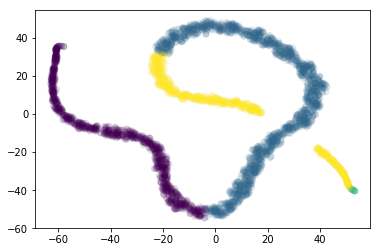

In [271]:
x=X_embedded[:,0]
y=X_embedded[:,1]
import matplotlib.pyplot as plt
plt.scatter(x,y,c=km.fit_predict(raw_vecs2),alpha=.1)
plt.show()

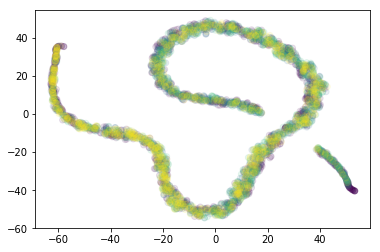

In [292]:
x=X_embedded[:,0]
y=X_embedded[:,1]
import matplotlib.pyplot as plt
plt.scatter(x,y,c=labels2,alpha=.1)
plt.show()

We have a bit of an issue since we don't know how KMeans internally assigned the numerical labels.  However, the fit seems to be so bad that it seems pointless to try and figure this out.

# CRAYBOT code

In [298]:
class CRAYBOT(nn.Module):
    
    
    def __init__(self,encoder,sent_length=3,n_samples=70,hidden_size=50,max_iter=10,n_layers=1,temperature=1,losses=None):
        
        super(CRAYBOT,self).__init__()
        
        self.sent_length=sent_length
        self.n_samples=n_samples
        self.n_layers=n_layers
        self.hidden_size=hidden_size
        self.max_iter=max_iter
        self.temperature=temperature
        size=encoder.wv['the'].shape[0]
        self.losses=None
        self.hidden=self.init_hidden()
        self.lstm = nn.LSTM(size, hidden_size,n_layers,batch_first=True)
        self.layer=nn.Linear(hidden_size,len(encoder.wv.vocab))
        self.encoder=encoder
        self.dropout=nn.Dropout(p=0.1)
        self.doc=None
    
    def forward(self,x,hidden):
        lstm_out, self.hidden=self.lstm(x,hidden)
        return self.layer(lstm_out), self.hidden
        
        
    def _clean(self,doc):
        doc1=' . '.join(doc)
        return [w.lower() for w in doc1.split()]
        
        
    def word_to_idx(self,word):
        return list(self.encoder.wv.vocab).index(word)
        
        
    def index_to_word(self,n):
        return list(self.encoder.wv.vocab)[n]
        
    def _make_training_set(self,doc):
    
        #self.n_samples=n_samples
        
        self.doc=doc
        
        clean_doc=self._clean(doc)
        if self.encoder is None:       
            self.encoder=gensim.models.Word2Vec([clean_doc], size=self.size, window=5, min_count=1, workers=4,sg=1)
        sent_length=self.sent_length
        n_samples=self.n_samples
        
        doc_words=' . '.join(doc).split()

        
        doc_length=len(doc_words)
        training_examples=[]
        X_train=[]
        #y_train=[]
        y_labels=[]
        for i in range(n_samples):
            index=random.choice(range(doc_length-self.sent_length))
            x=doc_words[index:index+self.sent_length]
            y=doc_words[index+1:index+self.sent_length+1]
            next_word=self.word_to_idx(y[-1])
            x_tensor=torch.tensor([self.encoder.wv[w.lower()] for w in x])            
            X_train.append(x_tensor)
            y_labels.append(next_word)

        Xt=torch.cat(X_train).view(self.n_samples,self.sent_length,-1)
        tags=torch.tensor(y_labels)
        
        return Xt, tags
    
    #Note that prep_string takes in 'doc' as a string.
    
    def clean_string(self,text):
        tokens = word_tokenize(text)
        clean_tokens = [lemmatize.lemmatize(token.lower().strip()) for token in tokens]
        return ' '.join(clean_tokens)

    def prep_string(self,doc):
        doc1=self.clean_string(doc).split()
        length=len(doc1)
        x_tensor=torch.tensor([self.encoder.wv[w.lower()] for w in doc1])
        return x_tensor.view(1,length,-1)
            
    
    def _sent_to_vec(self,sent):
        return torch.tensor([self.encoder.wv[w.lower()] for w in sent.split()])
        

    def init_hidden(self,batch_size=None):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        if batch_size is None:
            return (torch.zeros(self.n_layers, self.n_samples, self.hidden_size),
                    torch.zeros(self.n_layers, self.n_samples, self.hidden_size))
        else:
            return (torch.zeros(self.n_layers, batch_size, self.hidden_size),
                    torch.zeros(self.n_layers, batch_size, self.hidden_size))


    # 'string' should appear as a simple string.
    
    def fit(self,string):
        loss_function=nn.CrossEntropyLoss()

        optimizer = optim.Adam(self.parameters(),lr=.001)


        # Note that when we call '_make_training_set' we must repackage the string into a list.
        # In general we would pass in a list of documents, here we just have one document.

        Xt,tags=self._make_training_set([string])
        losses=[]


        for epoch in range(self.max_iter):
            self.hidden = self.init_hidden()
            hidden=self.hidden
            optimizer.zero_grad()
            length=self.sent_length

            out, hidden = self.forward(Xt,hidden)
            out2=out[:,length-1,:]
            loss=loss_function(out2,tags)
            #print(float(loss.detach().numpy()))
            losses.append(float(loss.detach().numpy()))
            loss.backward(retain_graph=True)
            optimizer.step()
        self.losses=losses

            
    def predict(self,sent,n):
        sent_string=sent[0]
        with torch.no_grad():
            hidden=self.init_hidden(batch_size=1)
            length=len(sent[0].split())
            for i in range(n):
                x=self.prep_string(sent[0])
                #x=clean_string(sent).split()
                out,hidden=self.forward(x,hidden)
                out2=out[:,length-1,:]
                probs=F.softmax(out2.div(self.temperature)).detach().numpy()[0]
                word=self.index_to_word(np.random.choice(len(probs),p=probs))
                sent_string=sent_string+' '+ word
        return sent_string